#  Content

1.Content
2.Introduksi
3.Tujuan
4.Pengolahan Data
5.Kesimpulan

#  Introduksi

Project ini ditujukan untuk memberikan rekomendasi kepada perusahaan mengenai jenis paket parabayar apa yang akan memberikan pendapatan yang besar kepada perusahaan. Selanjutnya, jenis paket prabayar yang terpilih akan dilakukan perhitungan anggaran iklan

# Tujuan

Terdapat 2 hipotesa yang akan diuji: 
1. Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda.
2. Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.

# Tahapan

Adapun tahapan dalam pengerjaan project ini:
    1. Menginput datasets dan memperlajari informasi umum data
    2. Konversikan data menjadi tipe data yang dibutuhkan
    3. Menemukan dan eliminasi kesalahan pada data
        3.1 Jumlah panggilan yang dilakukan dan menit yang digunakan per bulan
        3.2 Jumlah SMS yang dikirim per bulan
        3.3 Volume data per bulan
        3.4 Hitung pendapatan bulanan dari setiap pengguna
    4. Deskripsikan perilaku konsumen 
        4.1 Jumlah panggilan individu (menit) paket Surf dan Ultimate per bulan
        4.2 Jumlah SMS yang dikirim individu paket Surf dan Ultimate per bulan
        4.3 Volume data seluler individu (gigabyte) paket Surf dan Ultimate per bulan
        4.4 Rata-rata jumlah panggilan paket Surf dan Ultimate per bulan
        4.5 Rata-rata jumlah SMS paket Surf dan Ultimate per bulan
        4.6 Rata-rata volume data paket Surf dan Ultimate per bulan
        4.7 Variance jumlah panggilan paket Surf dan Ultimate per bulan
        4.8 Variance jumlah SMS paket Surf dan Ultimate per bulan
        4.9 Variance volume data paket Surf dan Ultimate per bulan
        4.10 Standar deviasi jumlah panggilan paket Surf dan Ultimate per bulan
        4.11 Standar deviasi jumlah SMS paket Surf dan Ultimate per bulan
        4.12 Standar deviasi volume data paket Surf dan Ultimate per bulan 
        4.13 Histogram dan deskripsi distribusi
     5. Kesimpulan

## Inisialisasi

In [2]:
# Muat semua library
import pandas as pd 
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
from math import factorial
import seaborn as sns 


## Memuat Data

In [3]:
# Muat file data ke dalam DataFrame yang berbeda
calls = pd.read_csv('/datasets/megaline_calls.csv') 
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv') 
plans = pd.read_csv('/datasets/megaline_plans.csv') 
users = pd.read_csv('/datasets/megaline_users.csv') 

## Mempersiapkan Data

## Paket Prabayar

In [4]:
# Tampilkan informasi/rangkuman umum tentang DataFrame paket-paket prabayar
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [5]:
# Tampilkan sampel data untuk paket-paket tersebut
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Hasil temuan:
1. Terdapat 2 paket prabayar yang tercatat yaitu paket ultimate dan surf
2. Tidak ada missing value pada datasets ini
3. Datasets hanya mengandung informasi penggunaan internet per bulan dalam satuan mb

Hal yang dilakukan untuk memperbaiki data:
1. Mengubah value dari mb ke gb pada kolom mb_per_month

## Memperbaiki Data

In [6]:
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024

In [7]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0



## Memperkaya Kualitas Data

## Pengguna

In [8]:
# Tampilkan informasi/rangkuman umum tentang DataFrame pengguna
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [9]:
# Tampilkan sampel data pengguna
users.sample()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
406,1406,Noble,Jefferson,54,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-03-04,surf,NaN


Hasil temuan :
1. Terdapat 500 baris dalam datasets ini
2. Terdapat missing value pada kolom churn_date
3. Tipe data kolom reg_date dan churn_date adalah object 
    
Hal yang dilakukan:
1. Mempelajari dan memperbaiki missing value pada kolom churn_date
2. Mengubah tipe kolom reg_date dan churn_date ke tipe date time

### Memperbaiki Data

In [10]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [12]:
users['churn_date'].fillna(0) 

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: churn_date, Length: 500, dtype: object

In [13]:
users.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

### Memperkaya Kualitas Data

Menambah kolom untuk menyimpan nama region tertentu (NY-NJ) yang ingin dicari dalam project ini 

In [14]:
#membuat kolom untuk menampilkan NY NJ
users['region'] = users['city'].str.split(", ").str.get(1)
#mengubah nilai selain dari NY-NJ menjadi other 
value = "NY-NJ-PA MSA"
users['region'] = users['region'].where(users['region']== value, 'Other')
#menampilkan hasil perubahan 
users['region'].value_counts()

Other           420
NY-NJ-PA MSA     80
Name: region, dtype: int64

In [15]:
#jumlah user_id
len(users['user_id'].unique())

500

In [16]:
users['month']=users['reg_date'].dt.month
users.sample()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,region,month
142,1142,Charlesetta,Dillard,18,"New Orleans-Metairie, LA MSA",2018-08-23,surf,NaT,Other,8


In [17]:
#menampilkan plans paket dari masing-masing user_id 
users_plan = users[['user_id','plan','month']]
users_plan = users_plan.rename(columns={'plan':'plan_name'})
users_plan

,user_id,plan_name,month
0,1000,ultimate,12
1,1001,surf,8
2,1002,surf,10
3,1003,surf,1
4,1004,surf,5
...,...,...,...
495,1495,surf,9
496,1496,surf,2
497,1497,ultimate,12
498,1498,surf,2


## Panggilan

In [18]:
# Tampilkan informasi/rangkuman umum tentang DataFrame panggilan
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [19]:
# Tampilkan sampel data berisi panggilan
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [20]:
len(calls['user_id'].unique())

481

Hasil temuan:
   1. Tipe data pada kolom call_date adalah object 
   2. Jumlah user_id yang unik ialah 481  
   3. Value pada kolom duration masih berkoma 
   
Hal yang dilakukan: 
   1. Mengubah tipe data kolom call_date menjadi date time
   2. Membulatkan value pada kolom duration ke atas

### Memperbaiki Data

In [21]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [22]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [23]:
#melakukan pengecekan terhadap kolom durasi apakah ada yang bernilai 0
duration_zero = calls.query('duration == 0')
duration_zero

,id,user_id,call_date,duration
19,1001_4,1001,2018-12-05,0.0
25,1001_13,1001,2018-12-24,0.0
31,1001_30,1001,2018-10-17,0.0
32,1001_31,1001,2018-11-03,0.0
34,1001_35,1001,2018-12-21,0.0
...,...,...,...,...
137714,1499_183,1499,2018-11-10,0.0
137715,1499_184,1499,2018-09-15,0.0
137720,1499_189,1499,2018-12-27,0.0
137722,1499_191,1499,2018-12-24,0.0


Berdasarkan pencarian dapat ditemukan bahwa terdapat 26834 baris yang memiliki durasi telfon adalah 0, nilai 0 diartikan sebagai miss called 

In [24]:
#membulatkan value duration ke atas
calls['duration_round'] = calls['duration'].apply(np.ceil)
calls.head()

,id,user_id,call_date,duration,duration_round
0,1000_93,1000,2018-12-27,8.52,9.0
1,1000_145,1000,2018-12-27,13.66,14.0
2,1000_247,1000,2018-12-27,14.48,15.0
3,1000_309,1000,2018-12-28,5.76,6.0
4,1000_380,1000,2018-12-30,4.22,5.0


### Memperkaya Kualitas Data

Menambahkan kolom bulan untuk memudahkan mengetahui perhitungan per bulan

In [25]:
calls['month'] = calls['call_date'].dt.month
#del calls['call_month']
calls.head()

,id,user_id,call_date,duration,duration_round,month
0,1000_93,1000,2018-12-27,8.52,9.0,12
1,1000_145,1000,2018-12-27,13.66,14.0,12
2,1000_247,1000,2018-12-27,14.48,15.0,12
3,1000_309,1000,2018-12-28,5.76,6.0,12
4,1000_380,1000,2018-12-30,4.22,5.0,12


In [26]:
calls['month'].value_counts()

12    30614
11    24651
10    21064
9     16523
8     13590
7     11105
6      8221
5      5959
4      3442
3      1620
2       774
1       172
Name: month, dtype: int64

## Pesan/SMS

In [27]:
# Tampilkan informasi/rangkuman umum tentang DataFrame SMS
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [28]:
# Tampilkan sampel data untuk SMS
messages.sample()

,id,user_id,message_date
36445,1242_117,1242,2018-10-27


In [29]:
len(messages['user_id'].unique())

402

Hasil temuan:
   1. tipe data pada kolom message_date tidak sesuai 
   2. jumlah user_id unik pada kolom messages ialah 482 
   3. tidak ada missing value pada datasets ini 

Hal yang dilakukan:
   1. mengubah tipe data pada kolom message_date dengan time date

### Memperbaiki Data

In [30]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Memperkaya Kualitas Data

Menambahkan kolom bulan untuk memudahkan mengetahui perhitungan per bulan

In [31]:
messages['month'] = messages['message_date'].dt.month
messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


## Internet

In [32]:
# Tampilkan informasi/rangkuman umum tentang DataFrame internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [33]:
# Tampilkan sampel data untuk traffic internet
internet.sample()

,id,user_id,session_date,mb_used
47524,1212_256,1212,2018-10-17,171.34


In [34]:
len(internet['user_id'].unique())

489

Hasil temuan:
   1. tipe data pada kolom session_date tidak sesuai
   2. value pada kolom mb_used masih dalam satuan megabyte 
   3. tidak ada ditemukan missing value pada datasets ini
   4. jumlah user_id unik dalam datasets ini ialah 489

Hal yang akan dilakukan:
   1. mengubah tipe data pada kolom session_date menjadi time date
   2. mengkonversi value pada kolom mb_used menjadi gigabyte

### Memperbaiki Data

In [35]:
#mengubah tipe session_date 
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Memperkaya Kualitas Data

In [36]:
#menambahkan kolom untuk menampilkan konversi mb_used menjadi gb_used
internet['gb_used'] = internet['mb_used']/1024
internet.head()

,id,user_id,session_date,mb_used,gb_used
0,1000_13,1000,2018-12-29,89.86,0.087754
1,1000_204,1000,2018-12-31,0.00,0.000000
2,1000_379,1000,2018-12-28,660.40,0.644922
3,1000_413,1000,2018-12-26,270.99,0.264639
4,1000_442,1000,2018-12-27,880.22,0.859590


In [37]:
#menambahkan kolom month untuk memudahkan perhitungan dalam satuan bulan
internet['month'] = internet['session_date'].dt.month
internet.head()

,id,user_id,session_date,mb_used,gb_used,month
0,1000_13,1000,2018-12-29,89.86,0.087754,12
1,1000_204,1000,2018-12-31,0.00,0.000000,12
2,1000_379,1000,2018-12-28,660.40,0.644922,12
3,1000_413,1000,2018-12-26,270.99,0.264639,12
4,1000_442,1000,2018-12-27,880.22,0.859590,12


## Mempelajari Syarat dan Kondisi Terkait Paket Prabayar

Persyaratan paket prabayar :
1. Megaline membulatkan detik ke menit dan megabyte ke gigabyte. 
2. Untuk panggilan, setiap panggilan individual dibulatkan ke atas: bahkan jika suatu panggilan berlangsung hanya satu detik, panggilan tersebut akan dihitung sebagai satu menit. 
3. Untuk traffic web, setiap sesi web individual tidak dibulatkan ke atas. Akan tetapi, total untuk sebulan dibulatkan ke atas. 
4. Jika seorang pengguna menghabiskan 1025 megabyte bulan ini, dia pun akan dikenai biaya untuk 2 gigabyte.

## Mengagregasi Data per Pengguna

In [38]:
#hitung jumlah panggilan yang dilakukan oleh setiap pengguna per bulan. Simpan hasilnya
total_calls_month = calls.pivot_table(index=['user_id','month'], values='duration_round', aggfunc='count') 
total_calls_month = total_calls_month.rename(columns={'duration_round':'call_count'})
total_calls_month.head()

call_count
user_id month            
1000    12             16
1001    8              27
        9              49
        10             65
        11             64

In [39]:
#hitung jumlah lama panggilan pengguna per bulan. Simpan hasilnya
total_duration_month = calls.pivot_table(index=['user_id','month'], values='duration_round', aggfunc='sum') 
total_duration_month = total_duration_month.rename(columns={'duration_round':'duration_used'})
total_duration_month.head()

duration_used
user_id month               
1000    12             124.0
1001    8              182.0
        9              315.0
        10             393.0
        11             426.0

In [40]:
# Hitung jumlah SMS yang dikirim oleh setiap pengguna per bulan. Simpan hasilnya.
total_sms_month = messages.pivot_table(index=['user_id','month'], values='message_date', aggfunc='count')
total_sms_month = total_sms_month.rename(columns={'message_date':'message_count'})
total_sms_month

message_count
user_id month               
1000    12                11
1001    8                 30
        9                 44
        10                53
        11                36
...                      ...
1496    9                 21
        10                18
        11                13
        12                11
1497    12                50

[1806 rows x 1 columns]

In [41]:
# Hitung volume traffic internet yang digunakan oleh setiap pengguna per bulan. Simpan hasilnya.
total_traffic_month = internet.pivot_table(index=['user_id','month'], values='gb_used', aggfunc='sum')
total_traffic_month

gb_used
user_id month           
1000    12      1.856904
1001    8       6.756982
        9      13.002754
        10     21.807119
        11     18.070605
...                  ...
1498    12     22.595400
1499    9      12.680430
        10     19.035576
        11     16.419756
        12     21.542197

[2277 rows x 1 columns]

In [42]:
# Gabungkan data panggilan, menit, SMS, dan internet berdasarkan user_id dan month (bulan)
calls_duration =  total_calls_month.merge(total_duration_month, on=['user_id','month'], how='outer')
calls_duration.reset_index().head()

,user_id,month,call_count,duration_used
0,1000,12,16,124.0
1,1001,8,27,182.0
2,1001,9,49,315.0
3,1001,10,65,393.0
4,1001,11,64,426.0


In [43]:
#gabungan call_duration dengan sms
call_duration_sms = calls_duration.merge(total_sms_month, on=['user_id','month'], how='outer')
call_duration_sms.reset_index().head()

,user_id,month,call_count,duration_used,message_count
0,1000,12,16.0,124.0,11.0
1,1001,8,27.0,182.0,30.0
2,1001,9,49.0,315.0,44.0
3,1001,10,65.0,393.0,53.0
4,1001,11,64.0,426.0,36.0


In [44]:
#gabungan call_duration_sms_internet
data_user_useage = call_duration_sms.merge(total_traffic_month, on=['user_id','month'], how='outer')
data_user_useage.reset_index().head()

,user_id,month,call_count,duration_used,message_count,gb_used
0,1000,12,16.0,124.0,11.0,1.856904
1,1001,8,27.0,182.0,30.0,6.756982
2,1001,9,49.0,315.0,44.0,13.002754
3,1001,10,65.0,393.0,53.0,21.807119
4,1001,11,64.0,426.0,36.0,18.070605


In [45]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
 8   region      500 non-null    object        
 9   month       500 non-null    int64         
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 39.2+ KB


In [46]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
 8   gb_per_month_included  2 non-null      float64
dtypes: float64(3), int64(5), object(1)
memory usage: 272.0+ bytes


In [47]:
plans=plans.rename(columns={'plan_name':'plan'})

In [48]:
user_plan = users.merge(plans,on='plan')
user_plan.sample()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,region,month,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
167,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT,Other,4,50,15360,500,20,10,0.03,0.03,15.0


In [49]:
user_plan = user_plan.drop(columns=['first_name','last_name','age','reg_date','churn_date'])

In [50]:
user_plan.sample()

,user_id,city,plan,region,month,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
191,1049,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,NY-NJ-PA MSA,2,50,15360,500,20,10,0.03,0.03,15.0


In [51]:
# Tambahkan informasi paket prabayarnya
new_data = data_user_useage.merge(user_plan, on=['user_id'], how='outer')
new_data.sample()

,user_id,call_count,duration_used,message_count,gb_used,city,plan,region,month,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
1333,1292,42.0,273.0,NaN,33.083779,"Dallas-Fort Worth-Arlington, TX MSA",surf,Other,1,50,15360,500,20,10,0.03,0.03,15.0


In [52]:
new_data.isnull().sum()

user_id                    0
call_count                45
duration_used             45
message_count            497
gb_used                   26
city                       0
plan                       0
region                     0
month                      0
messages_included          0
mb_per_month_included      0
minutes_included           0
usd_monthly_pay            0
usd_per_gb                 0
usd_per_message            0
usd_per_minute             0
gb_per_month_included      0
dtype: int64

In [53]:
new_data = new_data.fillna(0)

In [54]:
new_data.isnull().sum()

user_id                  0
call_count               0
duration_used            0
message_count            0
gb_used                  0
city                     0
plan                     0
region                   0
month                    0
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
gb_per_month_included    0
dtype: int64

In [55]:
# Hitung pendapatan bulanan untuk setiap pengguna berdasarkan calls
def pay_over_calls(new_data):
    a = new_data['duration_used']
    b = new_data['minutes_included']
    c = new_data['usd_per_minute']
    if a > b:
        return (a-b)*c
    return 0

In [56]:
new_data['pay_over_calls'] = new_data.apply(pay_over_calls,axis=1)
new_data.sample()

,user_id,call_count,duration_used,message_count,gb_used,city,plan,region,month,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,pay_over_calls
1519,1335,46.0,323.0,100.0,15.051631,"Dallas-Fort Worth-Arlington, TX MSA",surf,Other,6,50,15360,500,20,10,0.03,0.03,15.0,0.0


In [57]:
# Hitung pendapatan bulanan untuk setiap pengguna berdasarkan messages
def pay_over_message(new_data):
    a = new_data['message_count']
    b = new_data['messages_included']
    c = new_data['usd_per_message']
    if a > b:
        return (a-b)*c
    return 0

In [58]:
new_data['pay_over_message'] = new_data.apply(pay_over_message,axis=1)
new_data.sample()

,user_id,call_count,duration_used,message_count,gb_used,city,plan,region,month,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,pay_over_calls,pay_over_message
2003,1438,13.0,76.0,20.0,6.32166,"Orlando-Kissimmee-Sanford, FL MSA",surf,Other,6,50,15360,500,20,10,0.03,0.03,15.0,0.0,0.0


In [59]:
# Hitung pendapatan bulanan untuk setiap pengguna berdasarkan internet
def pay_over_internet(new_data):
    a = new_data['gb_used']
    b = new_data['gb_per_month_included']
    c = new_data['usd_per_gb']
    if a > b:
        return (a-b)*c
    return 0

In [60]:
new_data['pay_over_internet'] = new_data.apply(pay_over_internet,axis=1)
new_data.sample()

,user_id,call_count,duration_used,message_count,gb_used,city,plan,region,month,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,pay_over_calls,pay_over_message,pay_over_internet
229,1054,41.0,326.0,30.0,19.17332,"Phoenix-Mesa-Chandler, AZ MSA",surf,Other,4,50,15360,500,20,10,0.03,0.03,15.0,0.0,0.0,41.733203


In [61]:
new_data['pay_over_internet'] = new_data['pay_over_internet'].apply(np.ceil)
new_data.sample()

,user_id,call_count,duration_used,message_count,gb_used,city,plan,region,month,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,pay_over_calls,pay_over_message,pay_over_internet
1420,1316,24.0,158.0,42.0,12.382373,"Tulsa, OK MSA",surf,Other,5,50,15360,500,20,10,0.03,0.03,15.0,0.0,0.0,0.0


In [62]:
#menghitung total pendapatan
calls_revenue = new_data['pay_over_calls'].sum()
messages_revenue = new_data['pay_over_message'].sum()
internet_revenue = new_data['pay_over_internet'].sum()
total_revenue = calls_revenue + messages_revenue + internet_revenue

print(f'total_revenue:',(total_revenue),
      '; calls_revenue',(calls_revenue), 
      ': messages_revenue',(messages_revenue),
      '; internet_revenue',(internet_revenue))


total_revenue: 61266.18 ; calls_revenue 2900.25 : messages_revenue 330.92999999999995 ; internet_revenue 58035.0


In [63]:
new_data['total_revenue'] = new_data['pay_over_calls'] + new_data['pay_over_message'] + new_data['pay_over_internet'] + new_data['usd_monthly_pay']
new_data.sample()

,user_id,call_count,duration_used,message_count,gb_used,city,plan,region,month,messages_included,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,pay_over_calls,pay_over_message,pay_over_internet,total_revenue
648,1141,18.0,136.0,3.0,1.943379,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,NY-NJ-PA MSA,6,50,...,500,20,10,0.03,0.03,15.0,0.0,0.0,0.0,20.0


In [64]:
new_data.isnull().sum()

user_id                  0
call_count               0
duration_used            0
message_count            0
gb_used                  0
city                     0
plan                     0
region                   0
month                    0
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
gb_per_month_included    0
pay_over_calls           0
pay_over_message         0
pay_over_internet        0
total_revenue            0
dtype: int64

In [65]:
new_data.fillna(0)

,user_id,call_count,duration_used,message_count,gb_used,city,plan,region,month,messages_included,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,pay_over_calls,pay_over_message,pay_over_internet,total_revenue
0,1000,16.0,124.0,11.0,1.856904,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,Other,12,1000,...,3000,70,7,0.01,0.01,30.0,0.0,0.00,0.0,70.00
1,1001,27.0,182.0,30.0,6.756982,"Seattle-Tacoma-Bellevue, WA MSA",surf,Other,8,50,...,500,20,10,0.03,0.03,15.0,0.0,0.00,0.0,20.00
2,1001,49.0,315.0,44.0,13.002754,"Seattle-Tacoma-Bellevue, WA MSA",surf,Other,8,50,...,500,20,10,0.03,0.03,15.0,0.0,0.00,0.0,20.00
3,1001,65.0,393.0,53.0,21.807119,"Seattle-Tacoma-Bellevue, WA MSA",surf,Other,8,50,...,500,20,10,0.03,0.03,15.0,0.0,0.09,69.0,89.09
4,1001,64.0,426.0,36.0,18.070605,"Seattle-Tacoma-Bellevue, WA MSA",surf,Other,8,50,...,500,20,10,0.03,0.03,15.0,0.0,0.00,31.0,51.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1143,0.0,0.0,0.0,0.000000,"Cincinnati, OH-KY-IN MSA",surf,Other,10,50,...,500,20,10,0.03,0.03,15.0,0.0,0.00,0.0,20.00
2299,1307,0.0,0.0,0.0,0.000000,"Boston-Cambridge-Newton, MA-NH MSA",surf,Other,12,50,...,500,20,10,0.03,0.03,15.0,0.0,0.00,0.0,20.00
2300,1319,0.0,0.0,0.0,0.000000,"Colorado Springs, CO MSA",surf,Other,6,50,...,500,20,10,0.03,0.03,15.0,0.0,0.00,0.0,20.00
2301,1378,0.0,0.0,0.0,0.000000,"Denver-Aurora-Lakewood, CO MSA",surf,Other,12,50,...,500,20,10,0.03,0.03,15.0,0.0,0.00,0.0,20.00


In [66]:
new_data.isnull().sum()

user_id                  0
call_count               0
duration_used            0
message_count            0
gb_used                  0
city                     0
plan                     0
region                   0
month                    0
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
gb_per_month_included    0
pay_over_calls           0
pay_over_message         0
pay_over_internet        0
total_revenue            0
dtype: int64

## Mempelajari Perilaku Pengguna

### Panggilan

In [67]:
# Bandingkan durasi rata-rata panggilan setiap paket per bulannya. Buatlah sebuah diagram batang untuk memvisualisasikannya.
data_mean_calls_group = new_data.groupby(['month','plan'])['call_count'].mean().reset_index().sort_values(by='month')
data_mean_calls_group

,month,plan,call_count
0,1,surf,56.128571
1,1,ultimate,62.529851
2,2,surf,68.377990
3,2,ultimate,38.000000
4,3,surf,64.038674
5,3,ultimate,67.218182
6,4,surf,67.290984
7,4,ultimate,78.573529
8,5,surf,53.360294
9,5,ultimate,56.506329


Text(0.5, 1.0, 'Rata-rata jumlah panggilan per bulan')

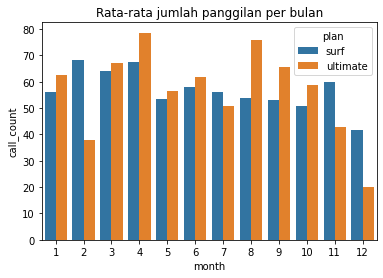

In [68]:
sns.barplot(data=data_mean_calls_group, x='month', y='call_count', hue='plan')
plt.title('Rata-rata jumlah panggilan per bulan')

Berdasarkan diagram yang ditampilkan dapat dilihat bahwasanya rata-rata jumlah panggilan per bulan oleh pengguna paket ultimate lebih tinggi dibandingkan dengan paket surf. Hal ini terlihat dari sebanyak 8 dari 12 bulan jumlah rata-rata pengguna paket ultimate lebih banyak melakukan panggilan. Selain itu, jumlah rata-rata panggilan tertinggi untuk tahun tersebut mencapai 80 kali untuk paket ultimate dan 70 kali untuk paket surf

In [69]:
# Bandingkan jumlah menit yang dibutuhkan pengguna tiap paket per bulannya. Buatlah sebuah histogram.
data_sum_duration_group = new_data.groupby(['month','plan'])['duration_used'].sum().reset_index().sort_values(by='month')
data_sum_duration_group

,month,plan,duration_used
0,1,surf,84614.0
1,1,ultimate,59392.0
2,2,surf,103303.0
3,2,ultimate,19929.0
4,3,surf,82147.0
5,3,ultimate,26040.0
6,4,surf,117365.0
7,4,ultimate,38370.0
8,5,surf,51987.0
9,5,ultimate,31220.0


Text(0.5, 1.0, 'Jumlah durasi per bulan')

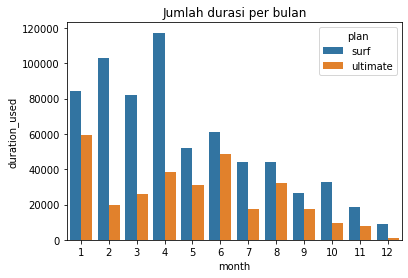

In [70]:
sns.barplot(data=data_sum_duration_group, x='month', y='duration_used', hue='plan')
plt.title('Jumlah durasi per bulan')

Berdasarkan diagram batang, secara umum dapat dilihat bahwa kedua paket prabayar mengalami traffic turun. Walaupun demikian informasi yang sangat terlihat jelas ialah jumlah durasi panggilan pengguna surf sangat tinggi dibandingkan dengan pengguna ultimate. Titik maksimum durasi untuk paket surf 2 kali lebih tinggi dibandingkan dengan titik maksimum paket ultimate yaitu 120000 dengan 60000

In [71]:
# Hitung rata-rata dan varians dari durasi panggilan bulanan

In [72]:
dur_mean = new_data.pivot_table(index='month', values='duration_used',columns='plan', aggfunc='mean', margins=True)
dur_mean

plan,surf,ultimate,All
month,,,
1,402.923810,443.223881,418.622093
2,494.272727,273.000000,436.992908
3,453.850829,473.454545,458.419492
4,481.004098,564.264706,499.150641
5,382.257353,395.189873,387.009302
6,417.753425,443.954545,429.011719
7,397.450450,375.782609,391.101911
8,381.695652,532.131148,433.835227
9,391.656716,454.384615,414.735849


Text(0.5, 1.0, 'Boxplot Mean Durasi Panggilan')

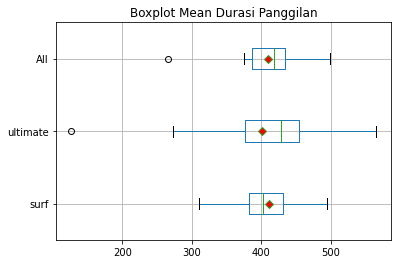

In [73]:
#boxplot
#menambahkan mean
mean_shape = dict(markerfacecolor = 'red', marker = 'D')
dur_mean.boxplot(vert=False, showmeans=True, meanprops=mean_shape)
plt.title('Boxplot Mean Durasi Panggilan')

Berdasarkan boxplot rata-rata dapat dilihat bahwasanya, sebaran data pada paket ultimate lebih besar dibandingkan dengan paket surf. Selain itu, dapat dilihat bahwa kedua paket memiliki kurva tidak simetris atau data miring. Pengguna ultimate memiliki positive skewnees dan pengguna surf memiliki negative skewness. Lebih lanjut terdapat nilai outlier ekstrem pada paket ultimate. 

Nilai rata-rata dari pengguna surf mendekati nilai median sedangkan pada pengguna ultimate nilai rata-rata terletak mendekati kuartil atas.  

In [73]:
dur_var = new_data.pivot_table(index='month', values='duration_used',columns='plan', aggfunc='var', margins=True)
dur_var

plan,surf,ultimate,All
month,,,
1,44167.439143,39013.017170,42427.349481
2,57526.930070,24315.805556,58239.508846
3,73204.727624,25085.808081,61905.087108
4,52579.148131,54466.167691,54002.006173
5,35081.022168,29324.796819,32858.084025
6,51936.614643,85271.236447,66150.748882
7,52331.122523,60878.040580,54559.002368
8,40255.020595,104286.282514,67132.961266
9,50540.622795,38113.453441,46485.605750


Text(0.5, 1.0, 'Boxplot Variance Durasi Panggilan')

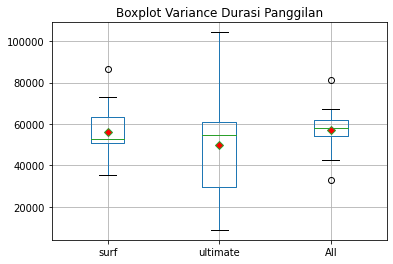

In [74]:
#boxplot
#menambahkan mean
mean_shape = dict(markerfacecolor = 'red', marker = 'D')
dur_var.boxplot(vert=True, showmeans=True, meanprops=mean_shape)
plt.title('Boxplot Variance Durasi Panggilan')

Berdasarkan boxplot variance dapat dilihat bahwasanya, sebaran data pada paket ultimate jauh lebih besar dibandingkan dengan paket surf. Lebih lanjut pada gambar dapat dilihat bahwasanya kedua paket memiliki kurva tidak simetris dengan paket surf memiliki negative skewness dan paket ultimate memiliki positive skewness. Selain itu, ditemukan outlier pada paket surf.

Nilai mean dari paket surf mendekati kuartil bawah sedangkan paket ultimate mendekati nilai mediannya. Secara keselutuhan nilai mean kedua paket memiliki posisi yang sangat dekat dengan nilai mediannya. 

Secara keseluruhan perilaku pengguna dalam melakukan panggilan untuk kedua paket tidaklah sama. Berdasarkan rata-rata durasi panggilan pengguna paket ultimate lebih banyak dibandingkan dengan paket surf. Sedangkan berdasarkan sebaran data, durasi panggilan terbesar ialah pengguna paket surf. Selain itu, nilai rata-rata durasi panggilan realitas pada paket surf lebih besar dibandingkan dengan paket ultimate untuk kedua tampilan boxplot. 

### Pesan/SMS

In [75]:
# Bandingkan jumlah SMS yang cenderung dikirim pengguna tiap paket per bulannya
text_count = new_data.groupby(['month','plan'])['message_count'].sum().reset_index().sort_values(by='month')
text_count

,month,plan,message_count
0,1,surf,6311.0
1,1,ultimate,3546.0
2,2,surf,6732.0
3,2,ultimate,2156.0
4,3,surf,4593.0
5,3,ultimate,719.0
6,4,surf,8602.0
7,4,ultimate,4356.0
8,5,surf,3261.0
9,5,ultimate,3044.0


Text(0.5, 1.0, 'Jumlah SMS per bulan')

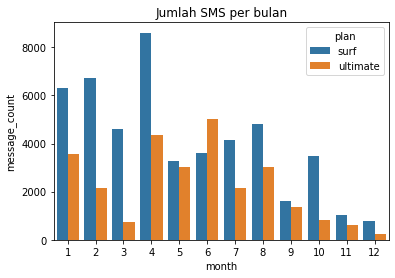

In [76]:
sns.barplot(data=text_count, x='month', y='message_count', hue='plan')
plt.title('Jumlah SMS per bulan')

Berdasarkan diagram batang, dapat dilihat secara umum pengguna paket surf memiliki jumlah SMS per bulan yang tinggi. Titik maksimum ditemukan pada bulan ke-4 dengan nilai lebih dari 800 SMS dalam 1 bulan. Aktivitas penggunaan SMS pada paket ultimate jauh lebih rendah dengan nilai maksimumnya ialah kurang lebih 500 SMS dalam 1 bulan. 

### Internet

In [77]:
# Bandingkan jumlah traffic internet yang dihabiskan oleh pengguna per paket
internet_count = new_data.groupby(['month','plan'])['gb_used'].sum().reset_index().sort_values(by='month')
internet_count

,month,plan,gb_used
0,1,surf,3557.965918
1,1,ultimate,2401.275449
2,2,surf,3557.417520
3,2,ultimate,1370.298125
4,3,surf,2888.377861
5,3,ultimate,893.961826
6,4,surf,3816.689707
7,4,ultimate,1240.200020
8,5,surf,2405.065283
9,5,ultimate,1310.025420


Text(0.5, 1.0, 'Jumlah GB per bulan')

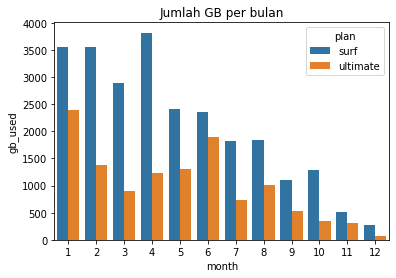

In [78]:
sns.barplot(data=internet_count, x='month', y='gb_used', hue='plan')
plt.title('Jumlah GB per bulan')

Berdasarkan penggunaan internet untuk kedua paket, dalam grafik dapat dilihat bahwa pengguna surf lebih banyak menggunakan kuota internet dari pada pengguna paket ultimate. Nilai maksimum penggunaan internet untuk kedua paket ialah hampir mencapai 4000 GB dalam 1bulan untuk paket surf dan hampir mencapai 2500GB unutk 1 bulan pakek ultimate

## Pendapatan

In [79]:
#pendapat dari calls
revenue_calls = new_data.groupby(['month','plan'])['pay_over_calls'].sum().reset_index()
revenue_calls

,month,plan,pay_over_calls
0,1,surf,288.81
1,1,ultimate,0.00
2,2,surf,559.32
3,2,ultimate,0.00
4,3,surf,431.82
5,3,ultimate,0.00
6,4,surf,585.42
7,4,ultimate,0.00
8,5,surf,113.37
9,5,ultimate,0.00


Text(0.5, 1.0, 'Jumlah Pendapatan Dari Panggilan')

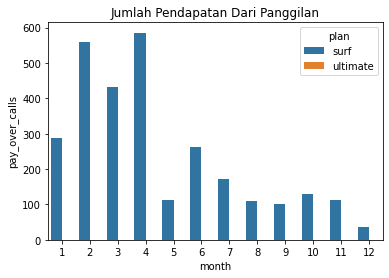

In [80]:
sns.barplot(data=revenue_calls, x='month', y='pay_over_calls', hue='plan')
plt.title('Jumlah Pendapatan Dari Panggilan')

Berdasarkan data penghasilan tambahan perusahaan yang berasal dari pembelian tambahan durasi telefon, dapat dilihat bahwasanya hanya pengguna paket surf yang banyak menambah durasi telfon. Besar pendapatan tambahan berkisar dari kurang 100 dollar hingga mencapai 600 dollar

In [81]:
#pendapat dari message
revenue_message = new_data.groupby(['month','plan'])['pay_over_message'].sum().reset_index()
revenue_message

,month,plan,pay_over_message
0,1,surf,29.85
1,1,ultimate,0.00
2,2,surf,52.44
3,2,ultimate,0.00
4,3,surf,33.33
5,3,ultimate,0.00
6,4,surf,60.45
7,4,ultimate,0.00
8,5,surf,16.71
9,5,ultimate,0.00


Text(0.5, 1.0, 'Jumlah Pendapatan Dari SMS')

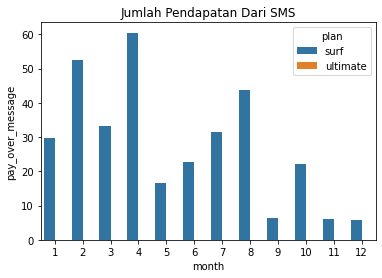

In [82]:
sns.barplot(data=revenue_message, x='month', y='pay_over_message', hue='plan')
plt.title('Jumlah Pendapatan Dari SMS')

Berdasarkan data penghasilan tambahan perusahaan yang berasal dari pembelian tambahan SMS, dapat dilihat bahwasanya hanya pengguna paket surf yang banyak menambah paket SMS. Besar pendapatan terbesarnya ialah hampir 60 dolar dalam 1 bulan dan pendapatan terendah ialah 5 dolar. 

In [83]:
#pendapat dari internet
revenue_internet = new_data.groupby(['month','plan'])['pay_over_internet'].sum().reset_index()
revenue_internet

,month,plan,pay_over_internet
0,1,surf,8264.0
1,1,ultimate,292.0
2,2,surf,8320.0
3,2,ultimate,549.0
4,3,surf,7032.0
5,3,ultimate,0.0
6,4,surf,7210.0
7,4,ultimate,212.0
8,5,surf,5693.0
9,5,ultimate,51.0


Text(0.5, 1.0, 'Jumlah Pendapatan Dari Internet')

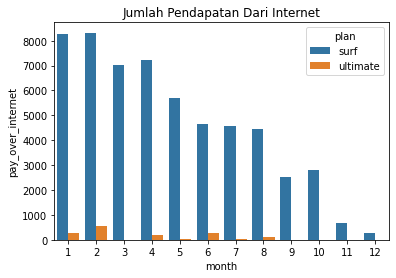

In [84]:
sns.barplot(data=revenue_internet, x='month', y='pay_over_internet', hue='plan')
plt.title('Jumlah Pendapatan Dari Internet')

Berdasarkan data penghasilan tambahan perusahaan dari internet dapat dilihat bahwa pengguna paket surf yang banyak membeli internet tambahan. Pendapatan tertinggi dari tambahan ini ialah 8000 dolar sedangkan pendapatan terendah ialah kurang lebih 300 dolar. 

Pendapatan tambahan perusahaan dari internet untuk pengguna ultimate sangat sedikit, jumlah pendapatan tertinggi dari pengguna ultimate kurang lebih 500 dolar 

In [85]:
#pendapat total
overall_revenue = new_data.groupby(['month','plan'])['total_revenue'].sum().reset_index()
overall_revenue

,month,plan,total_revenue
0,1,surf,12782.66
1,1,ultimate,9672.00
2,2,surf,13111.76
3,2,ultimate,5659.00
4,3,surf,11117.15
5,3,ultimate,3850.00
6,4,surf,12735.87
7,4,ultimate,4972.00
8,5,surf,8543.08
9,5,ultimate,5581.00


Text(0.5, 1.0, 'Total Pendapatan Tambahan')

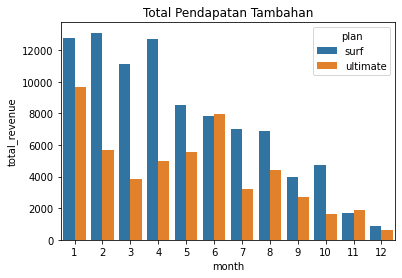

In [86]:
sns.barplot(data=overall_revenue, x='month', y='total_revenue', hue='plan')
plt.title('Total Pendapatan Tambahan')

Secara keseluruhan, total pendapatan diperoleh perusahaan banyak dikontribusi oleh pengguna surf dengan nilai maksimum mencapai lebih dari 12000 dolar dan nilai minimum mencapai kurang lebih 800 dolar. Selain itu, perbedaan pendapatan yang diperoleh perusahaan antar kedua paket sangat jauh berbeda. 

## Menguji Hipotesis Statistik

H0 = pendapatan rata-rata dari pengguna paket prabayar ultimate dan surf berbeda

H1 = pendapatan rata-rata dari penngguna paket prabayar ultimate dan surf sama

alpha = 0.05

In [87]:
# Uji hipotesisnya

#pendapatan rata-rata paket ultimate sebagai acuan
data_ulti = new_data.query('plan == "ultimate"')
#data pendapata yang akan disamakan dengan acuan 
data_surf = new_data.query('plan == "surf"')

In [88]:
var_ult = data_ulti['total_revenue'].var()
var_ult

117.14596753857087

In [89]:
var_surf = data_surf['total_revenue'].var()
var_surf

2910.280387789998

In [90]:
alpha = 0.05
#menggunakan equal_var = false karena variance antar populasi berbeda jauh
results_ulti_surf = st.stats.ttest_ind(data_ulti['total_revenue'],data_surf['total_revenue'],equal_var=False)
print('p-value: ', results_ulti_surf.pvalue)
if (results_ulti_surf.pvalue < alpha):
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak bisa menolak hipotesis nol")

p-value:  2.12588490385047e-23
Kita menolak hipotesis nol


/tmp/ipykernel_101/3949674201.py:3: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  results_ulti_surf = st.stats.ttest_ind(data_ulti['total_revenue'],data_surf['total_revenue'],equal_var=False)


Berdasarkan hasil pengujian hipotesis, diketahui bahwa kita menolah hipotesis 0 karena nilai p-value jauh lebih kecil dibandingkan dengan alpha. Artinya adalah pendatapan rata-rata antar kedua populasi tidaklah setara

In [91]:
new_data.sample()

,user_id,call_count,duration_used,message_count,gb_used,city,plan,region,month,messages_included,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,pay_over_calls,pay_over_message,pay_over_internet,total_revenue
1232,1264,43.0,334.0,60.0,15.766904,"Los Angeles-Long Beach-Anaheim, CA MSA",ultimate,Other,5,1000,...,3000,70,7,0.01,0.01,30.0,0.0,0.0,0.0,70.0


H0 = pendapatan kota NY-NJ berbeda dengan pendapatan kota Other 
H1  = pendapatan kota Ny-NU adalah sama dengan pendapatan kota Other
alpha = 0.05

In [92]:
# Uji hipotesisnya

data_ny = new_data.query('region == "NY-NJ-PA MSA"')
#pendapatan Other
data_other = new_data.query('region == "Other"')

In [93]:
var_ny = data_ny['total_revenue'].var()
var_ny

1788.8922930185397

In [94]:
var_other = data_other['total_revenue'].var()
var_other

2128.3859291596514

In [95]:
alpha = 0.05
#menggunakan equal_var = false karena variance antar populasi berbeda jauh
results_ny = st.stats.ttest_ind(data_ny['total_revenue'],data_other['total_revenue'],equal_var=False)
print('p-value: ', results_ny.pvalue)
if (results_ny.pvalue < alpha):
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak bisa menolak hipotesis nol")

p-value:  0.02504704763718382
Kita menolak hipotesis nol


/tmp/ipykernel_101/534243121.py:3: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  results_ny = st.stats.ttest_ind(data_ny['total_revenue'],data_other['total_revenue'],equal_var=False)


Berdasarkan hasil pengujian hipotesis dapat diketahui bahwa p-value yang dihasilkan (0.25) lebih kecil dibandingkan dengan alpha yang digunakan (0.05). Artinya, pendapatan antar kota NY-NJ dengan kota Other adalah sama, sehingga kita menolak hipotesis nol 

## Kesimpulan Umum

Project ini bertujuan untuk memberikan rekomendasi kepada perusahaan mengenai paket prabayar apa yang akan dijadikan anggaran promosi perusahaan. 

Terdapat 5 data awal yang disedikan oleh perusahaan. Dalam data tersebut ditemukan beberapa perbaikan dan penyesuaian yang perlu dilakukan seperti konversi tipe data, ektrak data tertentu, dan mengkonversi satuan serta mengatasi nilai yang hilang.   

Parameter yang digunakan sebagai acuan rekomendasi kepada perusahaan ialah parameter total pendapatan perusahaan dalam kurun waktu bulan. Di awal data, perusahaan telah mengantur fasilitas apa saja yang tersedia dan diberikan kepada pengguna. Adapun fasilitas gratis yang diberikan ialah durasi panggilan, sms, dan kuota internet. Bagi pengguna paket yang telah melewati batas fasilitas gratis yang diberikan oleh perusahaan, maka besar biaya yang akan dibayarkan pelanggan ialah besar kelebihan penggunaan yang dilakukan oleh pengguna dikalikan dengan besar biaya untuk fasilitas yang digunakan. Sehingga total pendapatan perusahaan berasal dari biaya paket prabayar yang dipilih oleh pengguna ditambah dengan biaya kelebihan atas fasilitas yang digunakan yang telah melewati batas maksimum yang diberikan perusahaan. 

Selain dari rekomendasi yang akan diberikan, pada project ini turut melibatkan pengujian hipotesis. Hipotesis yang terlibat pengujian ialah 
1. Rata-rata pendapatan dari penggguna paket Surf dan Ultimate adalah sama 
2. Pendapatan perusahaan yang berasal dari kota NY-NJ berbeda dengan pendapatan yang berasal dari kota diluar NY-NJ
Hasil dari kedua pengujian hipotesis ialah menolak H0 

Rekomendasi untuk perusahaan ialah jadikan paket surf sebagai dasar anggaran iklan. Hal ini karena pendapatan perusahaan besar dikontribusi oleh paket Surf